In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [3]:
country_df = pd.read_csv('country-visas.csv')

In [9]:
country_df.head()

,country,code,continent,AFG,ALB,DZA,AND,AGO,ATG,ARG,...,USA,URY,UZB,VUT,VAT,VEN,VNM,YEM,ZMB,ZWE
0,Afghanistan,AFG,Asia,NaN,4.0,4.0,4.0,4.0,3.0,4.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,3.0
1,Albania,ALB,Europe,4.0,NaN,4.0,0.0,4.0,0.0,4.0,...,4.0,4.0,4.0,4.0,0.0,4.0,4.0,4.0,1.0,3.0
2,Algeria,DZA,Africa,4.0,4.0,NaN,4.0,4.0,3.0,4.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,1.0,4.0,1.0
3,Andorra,AND,Europe,4.0,0.0,4.0,NaN,4.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,4.0,4.0,1.0,1.0
4,Angola,AGO,Africa,4.0,4.0,4.0,4.0,NaN,3.0,4.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,1.0,0.0


In [69]:
new_columns = list()
for col in country_df.columns:
    if col in country_df['code'].values:
        new_columns.append(country_df[country_df.code == col]['country'].values[0])
    else:
        new_columns.append(col)
    

In [70]:
country_df.columns = new_columns

In [71]:
country_df.fillna(5,inplace=True)

In [58]:
country_lats = pd.read_csv('worldcities.csv')

In [59]:
country_lats = country_lats[country_lats.capital == 'primary']

In [62]:
country_df = country_df.merge(country_lats[['country','lat','lng']],on='country')

In [73]:
country_df.drop(['code','continent'],inplace=True,axis=1)

In [64]:
country_df.to_csv('country_preprocessed.csv')

In [109]:
visa_df = pd.melt(country_df, id_vars=['country'])

In [110]:
visa_df.columns = ['country1','country2','visa_type']

In [111]:
visa_df = visa_df.merge(country_lats[['country','lat','lng']],left_on='country2',right_on='country')

In [112]:
visa_df = visa_df.merge(country_lats[['country','lat','lng']],left_on='country1',right_on='country')

In [113]:
visa_df.drop(['country_x','country_y'],inplace=True,axis=1)

In [115]:
visa_df.columns = ['country1','country2','visa_type','lat2','lng2','lat1','lng1']

In [116]:
visa_df.to_csv('country_preprocessed.csv')

In [117]:
visa_df.head()

,country1,country2,visa_type,lat2,lng2,lat1,lng1
0,Afghanistan,Afghanistan,5.0,34.5167,69.1833,34.5167,69.1833
1,Afghanistan,Albania,4.0,41.3275,19.8189,34.5167,69.1833
2,Afghanistan,Algeria,4.0,36.7631,3.0506,34.5167,69.1833
3,Afghanistan,Andorra,4.0,42.5000,1.5165,34.5167,69.1833
4,Afghanistan,Angola,4.0,-8.8383,13.2344,34.5167,69.1833


In [3]:
df = pd.read_csv('country_preprocessed.csv')


In [8]:
df.dtypes

Unnamed: 0      int64
country1       object
country2       object
visa_type     float64
lat2          float64
lng2          float64
lat1          float64
lng1          float64
dtype: object

In [ ]:
or (df['visa_type'] == 3))

In [24]:
df[df.country1 == 'Japan']

,Unnamed: 0,country1,country2,visa_type,lat2,lng2,lat1,lng1
13908,13908,Japan,Afghanistan,4.0,34.5167,69.1833,35.685,139.7514
13909,13909,Japan,Albania,0.0,41.3275,19.8189,35.685,139.7514
13910,13910,Japan,Algeria,4.0,36.7631,3.0506,35.685,139.7514
13911,13911,Japan,Andorra,0.0,42.5000,1.5165,35.685,139.7514
13912,13912,Japan,Angola,4.0,-8.8383,13.2344,35.685,139.7514
13913,13913,Japan,Argentina,0.0,-34.6025,-58.3975,35.685,139.7514
13914,13914,Japan,Armenia,1.0,40.1812,44.5136,35.685,139.7514
13915,13915,Japan,Australia,2.0,-35.2830,149.1290,35.685,139.7514
13916,13916,Japan,Austria,0.0,48.2000,16.3666,35.685,139.7514
13917,13917,Japan,Azerbaijan,1.0,40.3953,49.8622,35.685,139.7514


In [3]:
import requests
import json

result_df = pd.DataFrame()

year_list = [str(x) for x in range(2006,2020)]
for year in year_list:
    url = 'https://www.henleypassportindex.com/fetch?url=rankings%2F' + year
    response = requests.get(url)
    df_rank = pd.read_json(response.content.decode('utf-8'))
    df_rank['country_name'] = df_rank['passport'].apply(lambda x:x['name'])
    result_df = pd.concat([result_df,df_rank],ignore_index=True)


In [79]:
result_df.drop('passport',inplace=True,axis=1)

In [81]:
result_df.to_csv('country_rank_score.csv',index=False)

In [2]:
income_data = pd.read_json("D:\\DataViz\\Project\\visa-free-travel\\cleandata.json")

In [3]:
income_data.to_csv('IncomingGDPData.csv',index=False)

In [4]:
result_df = pd.read_csv('country_rank_score.csv')

In [12]:
income_data.head()

,connections,country_name,gdp_percapita,incoming,iso3_digit_code,lat,long,outgoing
0,"[Sri Lanka, Malaysia, Algeria, Dominica, Ecuad...",Yemen,1473.10,990000,887,15.552727,48.516388,0
1,"[Barbados, Peru, Bahamas, Hong Kong, Ireland, ...",Fiji,7750.43,658000,242,-16.578193,179.414413,0
2,"[Barbados, Canada, Dominica, United Kingdom, P...",Brunei,71776.65,225000,96,4.535277,114.727669,0
3,"[Peru, Panama, Argentina, Bahamas, Ireland, Ke...",Bolivia,6131.06,798000,68,-16.290154,-63.588653,837000
4,"[Kenya, Kuwait, Venezuela, Malaysia, Egypt, In...",Cambodia,1006.84,2882000,116,12.565679,104.990963,710000


In [5]:
scatter_countries = pd.merge(result_df[['score','rank','year','country_name']],income_data[['country_name','gdp_percapita','incoming','outgoing']],on='country_name',how='left')

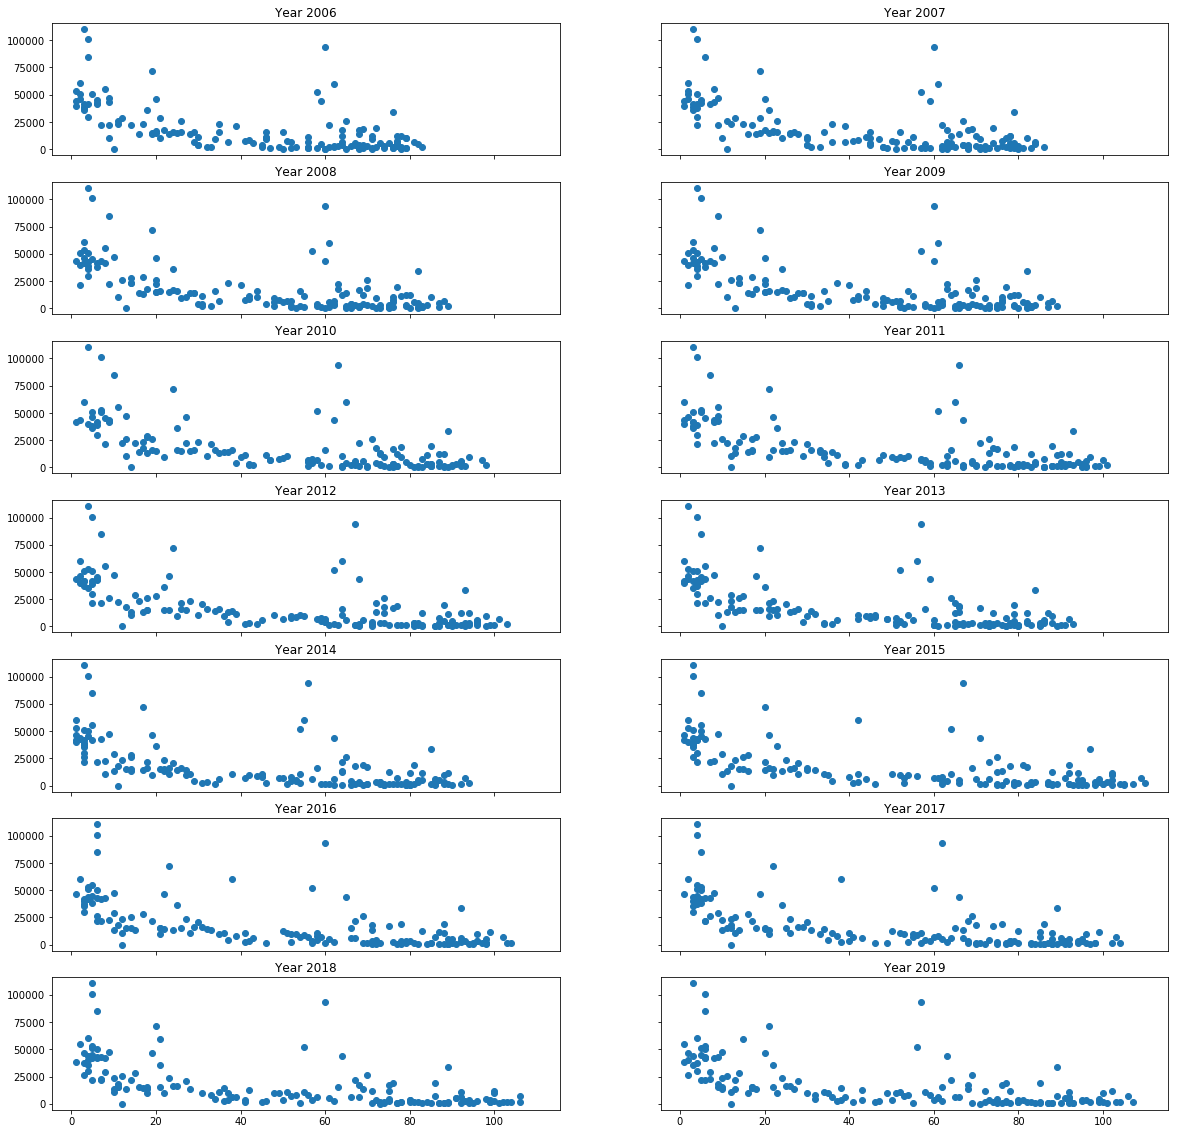

In [16]:
years = scatter_countries.year.unique().tolist()
k = 0
fig , ax = plt.subplots(7,2, sharex=True, sharey=True, figsize=(20,20))
for i in range(0,7):
    for j in range(0,2):
        ax[i][j].plot(scatter_countries[scatter_countries.year==years[k]]['rank'],scatter_countries[scatter_countries.year==years[k]].gdp_percapita,'o')
        ax[i][j].title.set_text('Year '+str(years[k]))
        k += 1

14

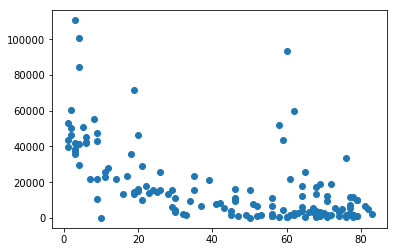

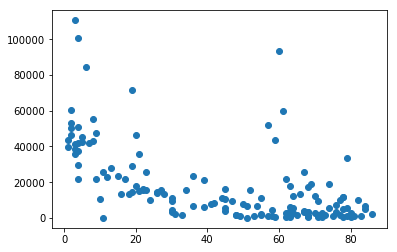

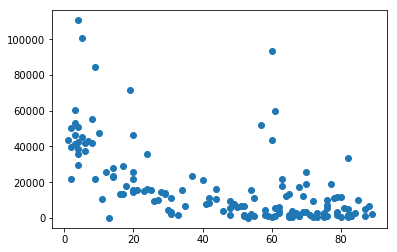

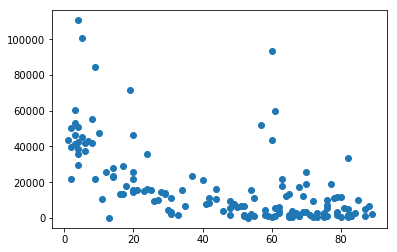

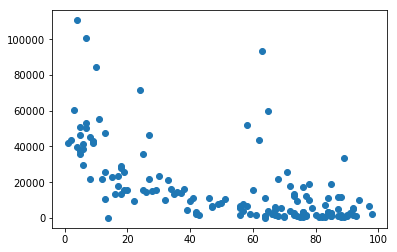

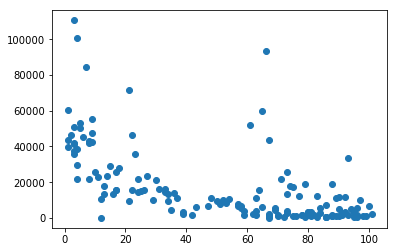

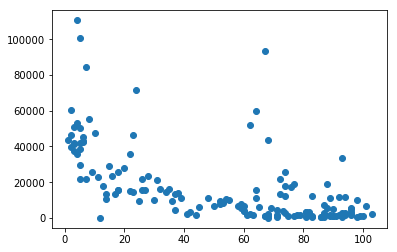

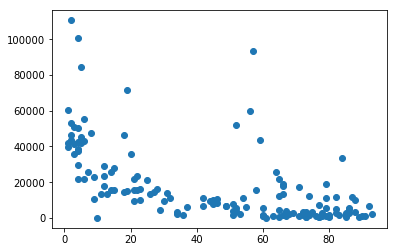

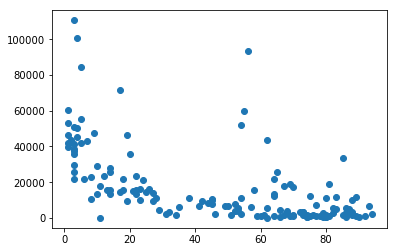

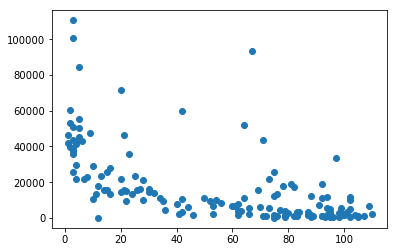

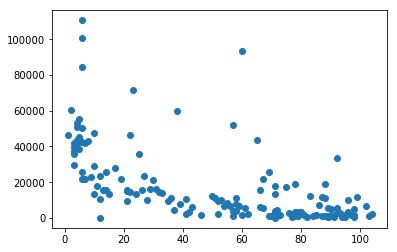

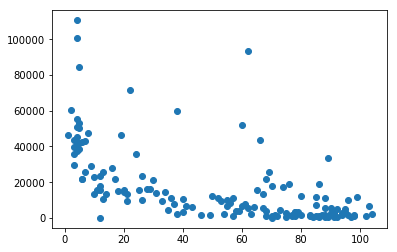

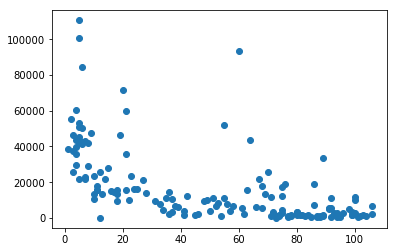

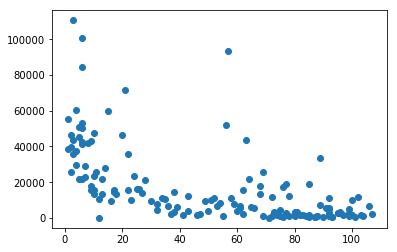

In [25]:
for yr in list(scatter_countries.year.unique()):
    plt.plot(scatter_countries[scatter_countries.year==yr]['rank'],scatter_countries[scatter_countries.year==yr].gdp_percapita,'o')
    plt.show()

In [19]:
scatter_countries['rank']import pickle

# open a file, where you stored the pickled data
file = open('important', 'rb')

# dump information to that file
data = pickle.load(file)

# close the file
file.close()

0         1
1         1
2         1
3         2
4         2
5         2
6         3
7         3
8         3
9         3
10        3
11        4
12        4
13        4
14        4
15        5
16        6
17        6
18        6
19        7
20        8
21        9
22        9
23        9
24        9
25       10
26       11
27       11
28       12
29       13
       ... 
2722     92
2723     92
2724     92
2725     92
2726     93
2727     93
2728     94
2729     95
2730     95
2731     95
2732     96
2733     97
2734     97
2735     97
2736     98
2737     99
2738     99
2739     99
2740    100
2741    100
2742    101
2743    102
2744    102
2745    102
2746    103
2747    104
2748    104
2749    105
2750    106
2751    107
Name: rank, Length: 2752, dtype: int64

In [4]:
import pickle
import pandas as pd

# open a file, where you stored the pickled data
file = open("D:\\DataViz\\Project\\df.pickle", 'rb')

# dump information to that file
data = pickle.load(file)

# close the file
file.close()

ImportError: No module named 'pandas.core.internals.managers'; 'pandas.core.internals' is not a package